In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
from GeneralModel import GeneralModel, DataStore

# Demonstration of a fast ODE simulator

+ The package $GeneralModel$ provides utility for quick prototyping and plotting of ODE's. 
+ There are some pre-defined models such as $SIR$ and $VanderPol$, however you can define your own model as well. 
+ The package provides time series and phase plot functionality. 
+ The parameters of the model are passed to the object as keyword arguments.

# SIR Model

The SIR model is a compartmental model that represents spread of an infectious disease through a population of size $N$.


\begin{align*}
    \dot{S} &= - \beta S I \\
    \dot{I} &= \beta I S - \gamma R \\
    \dot{R} &= \gamma R
\end{align*}

There are only two parameters, $\beta$ and $\gamma$ that govern the system. $S$, $I$, and $R$ stand for Susceptible, Infected, and Recovered populations respectively.

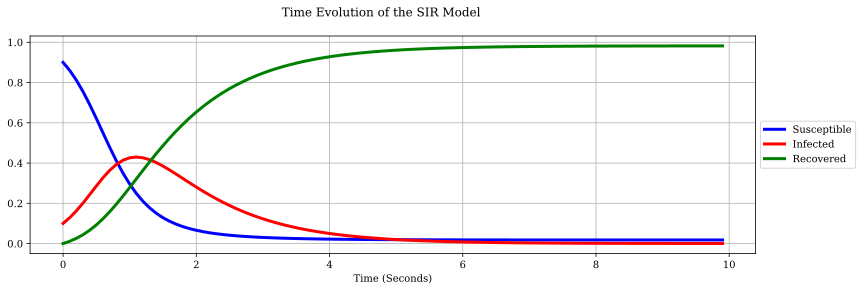

In [2]:
SIR = GeneralModel(Name="SIR", tstart=0, tend=10, dt=0.1, beta=4, gamma=1, N=1)
SIR.Initialize([0.9,0.1,0])
SIR.Simulate(Flow="SIR")
plt.rcParams["figure.figsize"] = (13, 4)
SIR.PlotState(states={0:"S",1:"I",2:"R"},colors=["b","r","g"],legend=["Susceptible","Infected","Recovered"])

In [3]:
DS = DataStore(SIR)
DS.SaveState("mytest")

In [4]:
DS.LoadData('mytest.csv')

,Time,x_1,x_2,x_3
0,0.0,0.900000,0.100000,0.000000
1,0.1,0.859929,0.128686,0.011386
2,0.2,0.811393,0.162698,0.025909
3,0.3,0.754512,0.201410,0.044079
4,0.4,0.690344,0.243357,0.066299
5,0.5,0.620949,0.286267,0.092785
6,0.6,0.549175,0.327331,0.123495
7,0.7,0.478193,0.363709,0.158098
8,0.8,0.410923,0.393074,0.196003
9,0.9,0.349573,0.413999,0.236428


## Van der Pol Oscillator

The Van der Pol oscillator is the classic example of a nonlinear system with a limit cycle. It is usually shown in the following form. 

\begin{align*}
    \ddot{x} = \mu (x^2 - 1)\dot{x} + x = 0
\end{align*}

We can split this into two first order equations as follows:

\begin{align*}
    \dot{x} &= y \\
    \dot{y} &= -x - \mu (x^2 - 1)y
\end{align*}

The parameter $\mu$ determines the existance and general behavior of the limit cycle.

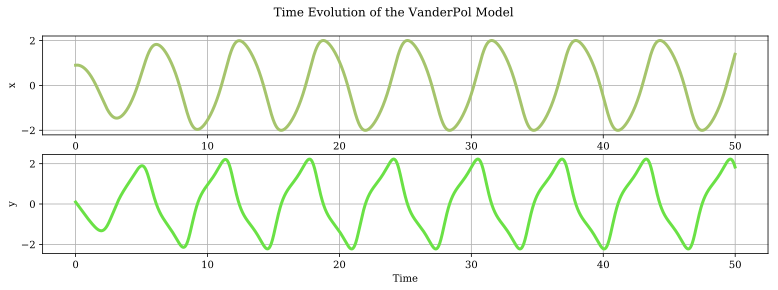

In [4]:
VDP = GeneralModel(Name="VanderPol", tstart=0, tend=50, dt=0.01, mu=0.5) 
VDP.Initialize([0.9,0.1]) 
VDP.Simulate(Flow="VanderPol") 
plt.rcParams["figure.figsize"] = (13, 4)
VDP.PlotState(states={0:"x",1:"y"})

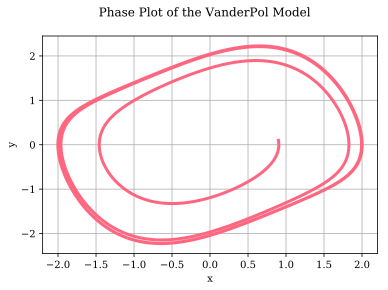

In [5]:
plt.rcParams["figure.figsize"] = (6, 4)
VDP.PlotPhase(color=[1,0.4,0.5])

## Kuramoto Model

The Kuramoto model is the classic example that demonstrates phase locking of $N$ coupled oscillators. 

\begin{align*}
    \dot{\theta}_i &= \omega_i + \frac{k}{N} \sum_{j=1}^N \sin(\theta_j - \theta_i) \\
    \dot{r}_i      &= 0
\end{align*}

The strength of coupling is determined by $k$. 

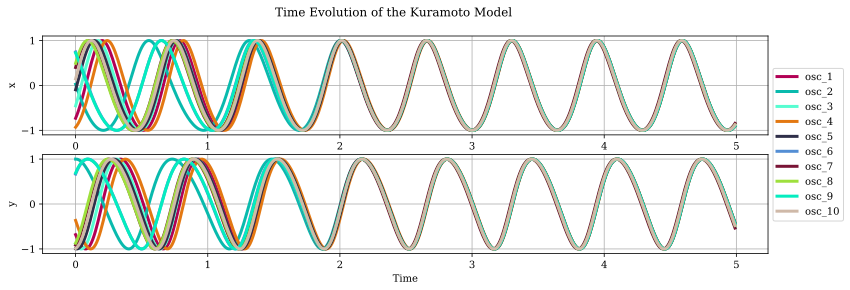

In [6]:
k, N, w_m, w_v = 0.2, 10, 10, 0.1
KM = GeneralModel(Name="Kuramoto", tstart=0, tend=5, dt=0.01, k=k, N=N, **{"w_{}".format(x):np.random.normal(w_m,w_v) for x in range(N)})
KM.Initialize(np.append([np.random.uniform(0,2*np.pi) for _ in range(N)],np.ones(N)))
KM.Simulate(UpdateMethod="RungeKutta",Flow="Kuramoto")
plt.rcParams["figure.figsize"] = (13, 4)
KM.PolarPlotState(states={"theta":range(N),"r":range(N,N+N)},statelabels=["x","y"],legend=["osc_{}".format(x+1) for x in range(N)])

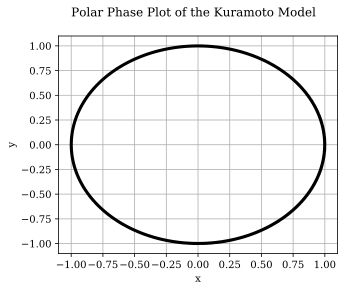

In [7]:
plt.rcParams["figure.figsize"] = (5, 4)
KM.PolarPlotPhase(states={"r":12,"theta":2})